#Speech Processing Lab - Week 2

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/153hjfFDhq5gIRcPzGAx3kjl8oiu639Vt?usp=sharing


Aim

*   To understand the difference between stationary and non-stationary signals.
*   To get a feel about the non stationary nature of speech signals.
*   To understand the limitations of Fourier transform in case of non-stationary signals.


#Theory 

**Introduction**

System is a physical entity that exists and produces signal. Signal is a physical quantity that is measurable. Signals are categorized into several classes based on the nature of the signal. Stationary vs/ Non-Stationary is one such classification.


**What are Stationary and Non-Stationary signals ?**

A signal is said to be stationary if its frequency or spectral contents are not changing with respect to time. One such example of stationary wave would be the sine wave that we generate using a function generator by selecting a fixed frequency.In this case the frequency content of the generated sine wave will not change with time, hence it is a stationary signal. 

Further, the definition of stationarity should not be confused with the time varying amplitude in the time domain as in the case of sine wave. Stationarity is linked only to the behavior of the frequency contents of the signal with respect to time and nothing else. 

Any signal that does not satisy the stationary signal criteria is classified as a Non - Stationary signal.

**Motivation**

Most of the signals, systems and signal processing concepts are taught based on the implied assumption of stationarity of the signal under consideration. Speech signal processing deviates in this aspect. This is because, speech is an example for non-stationary signal where as conventional synthetic signals like sine wave, triangular wave and square wave are stationary in nature. Hence different approaches and tools are needed to process the speech signal. To appreciate the new approaches and also tools developed exclusively for speech processing, we should get a feel about stationary v/s non-stationary classification of signal and to understand the limitation of Fourier Representation in analysing an non-stationary signal.

#Problem A

Generation of a singletone sine wave and its spectrum.

a. Generate a 10 Hz sine wave sampled at 1000 Hz sampling frequency
and for a duration of 1 sec for this problem.

**Procedure**
1. Generate a singletone wave using numpy library.
>Singletone wave = $sin(2*\pi*10*t); 0\leq t \leq 1$ 
2. Generate time domain plot, frequency domain (amplitude) plot and spectrogram using scipy and matplotlib libraries. 

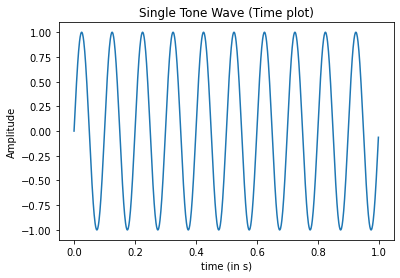

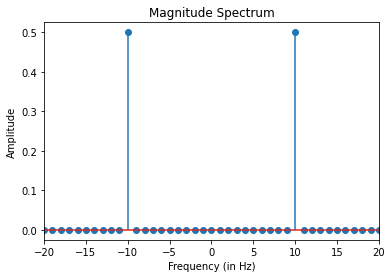

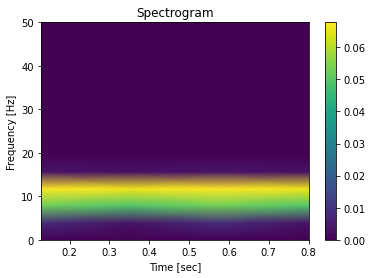

In [3]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal

# Defining program variables
f = 10 # Sine wave frequency in Hz
fs = 1000 # Sampling frequency in Hz
t_max = 1 # Length of sine wave in seconds
t = np.arange(0,t_max,1/fs) # Time vector for sine wave computation
totalSamples = t_max*fs; # Total samples in the wave

# Computing Singletone Wave 
singletoneWave = np.sin(2*np.pi*f*t); # Singletone wave

# Computing fft of the wave
wave_fft_a = fft(singletoneWave)/totalSamples 
freqs = fftfreq(totalSamples, 1 / fs) #frequency vector for the plot

# Computing spectrogram
f_a, t_a, Sst = signal.spectrogram(singletoneWave, fs) 

# Time domain plot
plt.figure()
plt.plot(t,singletoneWave)
plt.title("Single Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

# Frequency domain plot 
plt.figure()
plt.title("Magnitude Spectrum")
plt.stem(freqs, np.abs(wave_fft_a),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-20,20))
plt.show()

# Spectrogram
plt.figure()
plt.pcolormesh(t_a, f_a, Sst, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,50))
plt.colorbar()
plt.show()

**Observation**

From above Frequency domain plot we can observe that the signal contain a single frequency component at 10 Hz. From spectrogram we can observe that the frequency property of the signal is constant throughout time. Hence the signal is a stationary signal.

#Problem B

a. Generate a multitone sine wave composed of 10, 50 and 100 Hz
frequency components. Use a sampling frequency of 1000Hz and a
wave of duration 1 sec for the problem.

**Procedure**
1. Generate a multitone sine wave using numpy library.
>Multitone wave = $sin(2*\pi*10*t) + sin(2*\pi*50*t) + sin(2*\pi*100*t); 0\leq t \leq 1$ 
2. Generate time domain plot, frequency domain (amplitude) plot and spectrogram using scipy and matplotlib libraries.

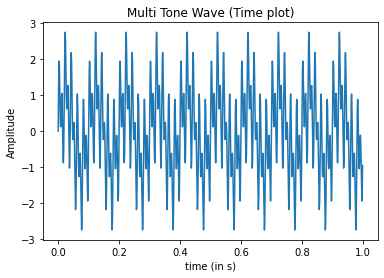

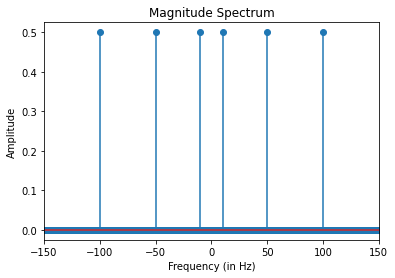

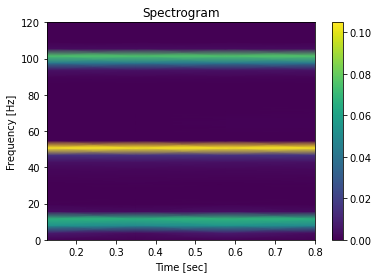

In [4]:
# Defining program variables
# Frequency components of multitone sine wave in Hz
f1 = 10
f2 = 50
f3 = 100 

fs = 1000 # Sampling frequency in Hz
t_max = 1 # Length of sine wave in seconds
t = np.arange(0,t_max,1/fs) # Time vector for sine wave computation
totalSamples = t_max*fs; # Total samples in the wave

# Computing multitone Wave 
multitoneWave = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+np.sin(2*np.pi*f3*t); 

# Computing fft of the wave
wave_fft_b = fft(multitoneWave)/totalSamples 
freqs = fftfreq(totalSamples, 1 / fs) #frequency vector for the plot

# Computing spectrogram
f_b, t_b, Smt = signal.spectrogram(multitoneWave, fs) 

# Time domain plot
plt.figure()
plt.plot(t,multitoneWave)
plt.title("Multi Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

# Frequency domain plot.
plt.figure()
plt.title("Magnitude Spectrum")
plt.stem(freqs, np.abs(wave_fft_b),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()

# Spectrogram
plt.figure()
plt.pcolormesh(t_b, f_b, Smt, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,120))
plt.colorbar()
plt.show()

#Problem C

Generation of a non-stationary multitone sine wave and its spectrum.

a. Generate a non-stationary multitone sine wave made of different
combinations of 10, 50 and 100 Hz components. Example combination:

*   Sin(2𝛱*10*t) ; 0 < t < 0.2 sec
*   Sin(2𝛱*10*t) + Sin(2𝛱*50*t) ; 0.2 < t < 0.5 sec
*   Sin(2𝛱*10*t) + Sin(2𝛱*50*t) + Sin(2𝛱*100*t) ; 0.5 < t < 1 sec

b. Generate the frequency spectrum taking the whole signal at once and
taking each stationary part of the signal individually. Record your
observations on the spectrum obtained by using the whole signal, the
stationary parts individually and the limitations of Fourier Transform
when we consider the whole non-stationary speech signal.

**Procedure**
1. Generate non-stationay sine wave using different combinations of the single tone components available. 


*   Part 1 = $sin(\pi*10*t) ; 0\leq t \leq 0.2 sec$
*   Part 2 = $sin(\pi*10*t) + sin(\pi*50*t) ; 0.2\leq t \leq 0.5 sec$
*   Part 3 $sin(\pi*10*t) + sin(\pi*50*t) + sin(\pi*100*t) ; 0.5\leq t \leq 1.0 sec$
> Non-stationary sine wave = Part 1 + Part 2 + Part 3
2. Plot the Magnitude spectrum for individual parts of the signal and for the complete signal. 
3. Plot the spectrogram of the complete signal.



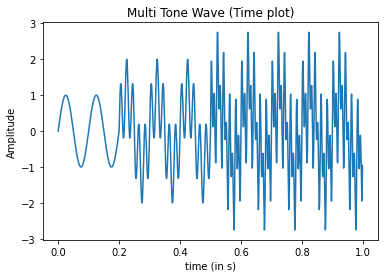

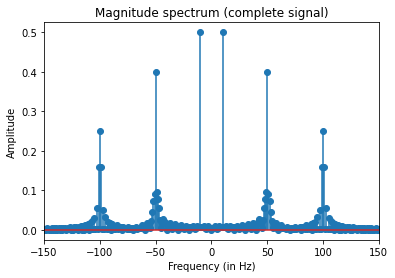

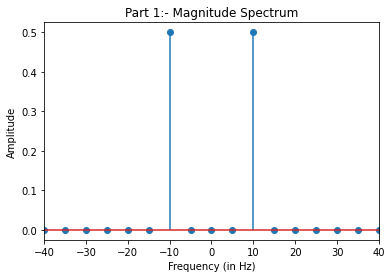

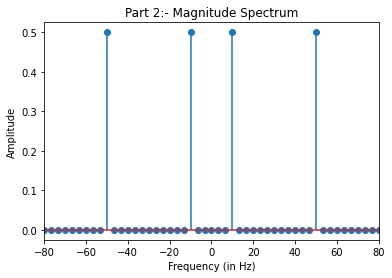

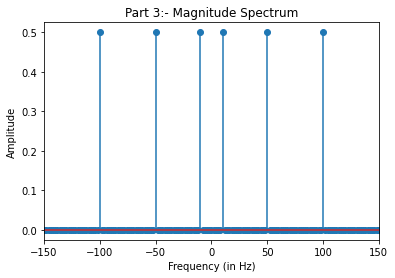

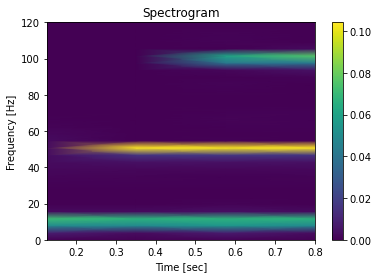

In [5]:
# Defining program variables
# Frequency components of multitone sine wave in Hz
f1 = 10
f2 = 50
f3 = 100 

fs = 1000 # Sampling frequency in Hz
t_max = 1 # Length of sine wave in seconds
t = np.arange(0,t_max,1/fs) # Time vector for sine wave computation
totalSamples = t_max*fs; # Total samples in the wave

# Subsamples of time vector
t1 = t[0:int (0.2*fs)] # Samples corresponding to 0<t<0.2
t2 = t[int (0.2*fs) :int (0.5*fs)] # Samples corresponding to 0.2<t<0.5
t3 = t[int (0.5*fs) :fs] # Samples corresponding to 0.5<t<1

# Computing Non-Stationary Wave 
part1 = np.sin(2*np.pi*f1*t1)
part2 = np.sin(2*np.pi*f1*t2)+np.sin(2*np.pi*f2*t2)
part3 = np.sin(2*np.pi*f1*t3)+np.sin(2*np.pi*f2*t3)+np.sin(2*np.pi*f3*t3)
nonStationaryWave = np.array([])
nonStationaryWave = np.hstack((part1,part2,part3)) # Complete signal

# Computing fft of the wave
wave_fft_c = fft(nonStationaryWave)/totalSamples 
freqs = fftfreq(totalSamples, 1 / fs) # Frequency vector for the plot

f_c, t_c, Snst = signal.spectrogram(nonStationaryWave, fs) #spectrogram computation

# Computing individual part fft
# Part1
fft_1 = fft(part1)/(totalSamples*0.2) 
freqs1 = fftfreq(int (totalSamples*0.2), 1 / fs) 

# Part2
fft_2 = fft(part2)/(totalSamples*0.3) 
freqs2 = fftfreq(int (totalSamples*0.3), 1 / fs) 

# Part3
fft_3 = fft(part3)/(totalSamples*0.5) 
freqs3 = fftfreq(int (totalSamples*0.5), 1 / fs) 

# Time domain plot
plt.figure()
plt.plot(t,nonStationaryWave)
plt.title("Multi Tone Wave (Time plot)")
plt.xlabel("time (in s)")
plt.ylabel("Amplitude")
plt.show()

# Frequency domain plots (FFT)
plt.figure()
plt.title("Magnitude spectrum (complete signal)")
plt.stem(freqs, np.abs(wave_fft_c),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()


plt.figure()
plt.title("Part 1:- Magnitude Spectrum")
plt.stem(freqs1, np.abs(fft_1),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-40,40))
plt.show()

plt.figure()
plt.title("Part 2:- Magnitude Spectrum")
plt.stem(freqs2, np.abs(fft_2),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-80,80))
plt.show()

plt.figure()
plt.title("Part 3:- Magnitude Spectrum")
plt.stem(freqs3, np.abs(fft_3),use_line_collection = True)
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim((-150,150))
plt.show()

# Spectrogram
plt.figure()
plt.pcolormesh(t_c, f_c, Snst, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,120))
plt.colorbar()
plt.show()


**Observations**

As the sine wave generated is non-stationary the frequency property of the signal varies with time. This can be observe in the magnitude spectrum of individual parts of the entire signal, that is each part (Part 1 to Part 3) has different combinations of frequencies in it. 

The magnitude spectrum of the entier signal provides the information about the different frequency components present in the signal, but not the information about when those frequency contents existed, that is, timing information is missing.

This is the limitation of Fourier Transform when we consider the whole non-stationary speech signal.

The essential information in the non-stationary signal is stored in the time varying spectrum. We cannot use the Fourier Transform to analyse an non-stationary signal as we loss the time domin information in the process. To resolve this issue we consider small segments of an non-stationary signal to be stationary and compute the spectra of each segment. 

#Problem D

Plotting waveform and spectra of speech signal.

a. Record the phrase ‘Sakshaat Speech Processing’ and save it in a .wav
file. Now, (re)sample the speech signal to 8kHz and plot the speech
signal.


b. Compute and plot the spectrum of the different categories of sounds
present in the recorded speech file. Inspect the spectral properties of
sounds belonging to different categories, and comment on the nature
of the whole speech signal.

**Procedure**

1. Record the phrase ‘Sakshaat Speech Processing’ using wavesurfer and save it in .wav format. Upload the file in Google drive and access it in the colob.
2. Read the .wav file using librosa library and resample it to 8K Hz
3. Use wavesurfer to identify any 5 different speech components present in the phrase ‘Sakshaat Speech Processing’ and record the time interval information of each component. In this lab I have identified the sounds sh,aa,th,ee,ing.
4. Plot the magnitude spectrum for the complete speech and for the individual components.
5. Plot the spectrogram of the speech signal. 

In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


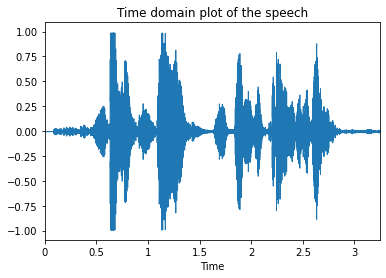

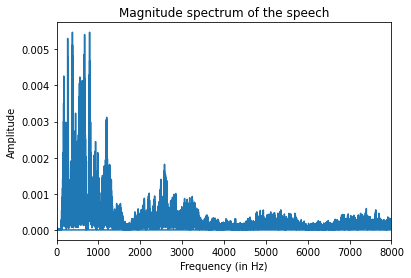

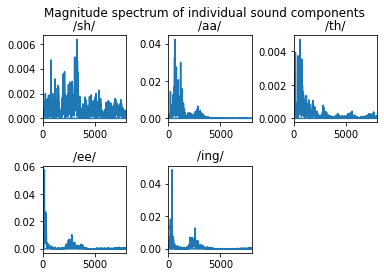

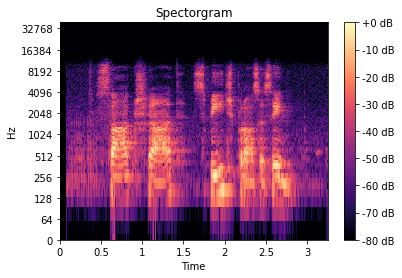

In [7]:
# Imports
from scipy.io import wavfile
import scipy.signal as sps

# Sampling frequency in Hz
fs = 80000 

# .wav file path
path = "/content/gdrive/MyDrive/Sem6/Speech Lab/Week2/week2audio.wav"

import librosa
import librosa.display

# Loading the .wav file 
speech, fs = librosa.load(path,sr = fs)

# Computing magnitude spectrum of the speech
totalSamples = speech.shape[0]
wave_fft_d = fft(speech)/totalSamples # Computing fft of the wave
freqs = fftfreq(totalSamples, 1 / fs) # Frequency vector for the plot

# Different categories of sound in the speech
# The time stamp for each sound component was extracted from wavesurfer and they
# are as follows:
# /sh/ - 0.896 s to 1.077 s
# /aa/ - 1.106 s to 1.301 s
# /th/ - 1.351 s to 1.536 s
# /ee/ - 1.906 s to 2.018 s
# /ing/ - 2.591 s to 2.842 s

sh = speech[int (0.896*fs):int (1.077*fs)]
aa = speech[int (1.106*fs):int (1.301*fs)]
th = speech[int (1.351*fs):int (1.536*fs)]
ee = speech[int (1.906*fs):int (2.018*fs)]
ing = speech[int (2.591*fs):int (2.842*fs)]
sound = [sh,aa,th,ee,ing]
soundName = ['/sh/','/aa/','/th/','/ee/','/ing/']

# Plotting the time domain plot of the speech
librosa.display.waveplot(speech, sr=fs);
plt.title("Time domain plot of the speech")
plt.show()

# Plotting magnitude spectrum of the speech
plt.figure()
plt.title("Magnitude spectrum of the speech")
plt.plot(freqs, np.abs(wave_fft_d))
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Amplitude")
plt.xlim(0,8000)
plt.show()

# Plotting magnitude spectrum of individual sound components
j = 0;
for curSound in sound:
  Length = curSound.shape[0]
  fft_d = fft(curSound)/Length # Computing fft of the wave
  freqs = fftfreq(Length, 1 / fs) # Frequency vector for the plot
  plt.subplot(2,3,j+1)
  plt.title(soundName[j])
  plt.plot(freqs,np.abs(fft_d))
  plt.xlim(0,8000)
  j = j+1
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle("Magnitude spectrum of individual sound components")
plt.show()

# Plotting spectrogram of the speech signal
hop_length = 512
n_fft = 2048
D = np.abs(librosa.stft(speech, n_fft= n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure()
librosa.display.specshow(DB, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title("Spectorgram")
plt.show()

**Observation**

From the above magnitude spectrum plots we can observe that each sound component has different spectral properties. Due to this we conclude that speech is a non-stationary signal.
As discussed in the last session, a non-stationary signal cannot be analysed using Fourier Transform. Hence we use STFT to analyse speech signals

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=371&cnt=1104
2. Basics of librosa library:- https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0
3. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/